# 第二题：使用sklearn的KMeans完成聚类

实验内容：
1. 使用sklearn的KMeans在Breast_Cancer_Wisconsin数据集上完成聚类任务
2. 对聚类结果可视化
3. 对比外部指标FMI和NMI
4. 选取数据集部分特征进行KMeans聚类，然后对聚类结果进行可视化，并与全量特征的聚类结果进行对比分析

# 1. 导入模块

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 2. 导入数据集

In [2]:
data = pd.read_csv('data\Breast_Cancer_Wisconsin\data')
data = data.values 
data_x = data[:,2:-1]
data_y = data[:,1:2]
print(data_x.shape)

(569, 30)


# 3. 导入模型

导入KMeans模型模型

In [3]:
from sklearn.cluster import KMeans

# 4. 训练模型

In [4]:
# YOUR CODE HERE
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_x)

KMeans(n_clusters=2, random_state=0)

KMeans模型需要使用predict函数预测类标记

In [5]:
# YOUR CODE HERE
y_hat = kmeans.predict(data_x)

聚类结果统计

In [6]:
def getResult(data_y,y_hat):
    true_labels = data_y.reshape(-1)
    cluster = {}
    # 构造簇
    for i in range(len(y_hat)):
        cluster_label = y_hat[i]
        if cluster_label not in cluster:
            cluster[cluster_label] = {}
    # 构造簇内类别标签
    for cluster_label in cluster:
        for true_label in list(set(true_labels)):
            cluster[cluster_label][true_label] = 0
    # 添加簇内数据
    for i in range(len(y_hat)):
            cluster_label = y_hat[i]
            cluster[cluster_label][true_labels[i]] +=1
    # 按照簇序号排序
    cluster = dict(sorted(cluster.items(),key = lambda x:x[0]))
    return cluster
cluster = getResult(data_y,y_hat)
print(cluster)

{0: {'M': 82, 'B': 356}, 1: {'M': 130, 'B': 1}}


# 5. 聚类结果可视化

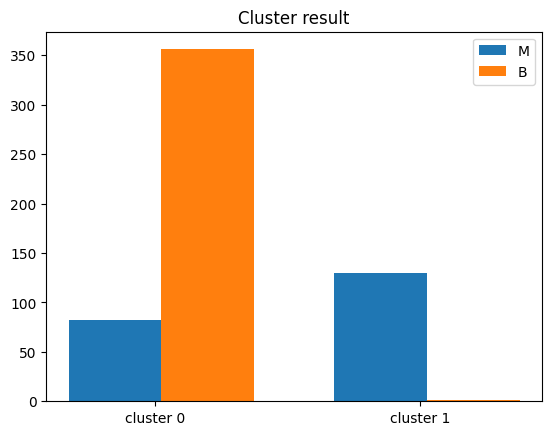

In [7]:
def draw_bar(cluster_data):
    # 构造绘图数据
    y_data = {}
    for cluster_label in cluster_data:
        for true_label in cluster_data[cluster_label]:
            y_data[true_label] = []
        break
    for cluster_label in cluster_data:
        for true_label,num in cluster_data[cluster_label].items():
            y_data[true_label] +=[num]

    # 绘图
    bar_width = 0.35
    t = 0  # 偏移量
    for key,data in y_data.items():
        plt.bar(np.arange(len(data))+t,data,label = key,width = bar_width)
        t+=bar_width

    labels = ["cluster "+str(l) for l in cluster_data]
    plt.xticks(np.arange(len(data))+bar_width-0.2,labels)
    plt.title("Cluster result")
    plt.legend()
draw_bar(cluster)

## 6. 指标计算

我们这里选用两个外部指标，FMI和NMI。

互信息(mutual information)表示了两个分布的一致程度。归一化的互信息(NMI)将互信息值映射到0到1的空间内。值越高，说明两个分布的一致性越高。

FMI是Fowlkes-Mallows index，使用precision和recall计算得到，其值域也是0到1，越大说明聚类效果越和参考模型相近。

In [8]:
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score

In [9]:
normalized_mutual_info_score(data_y.reshape(-1), kmeans.predict(data_x))

0.46479332792160793

In [10]:
fowlkes_mallows_score(data_y.reshape(-1), kmeans.predict(data_x))

0.7915171728708068

# 7. 选取数据集部分特征进行KMeans聚类：并对比聚类结果

In [11]:
data = pd.read_csv('data\Breast_Cancer_Wisconsin\data')

In [12]:
# YOUR CODE HERE
# 选取部分列特征，并构造数据集
selected_features = data.iloc[:, 2:12] # 取10个特征

In [13]:
# YOUR CODE HERE
# 模型定义，训练和预测
kmeans_selected = KMeans(n_clusters=2, random_state=0)
kmeans_selected.fit(selected_features)
y_hat_selected = kmeans_selected.predict(selected_features)

{0: {'M': 90, 'B': 355}, 1: {'M': 122, 'B': 2}}


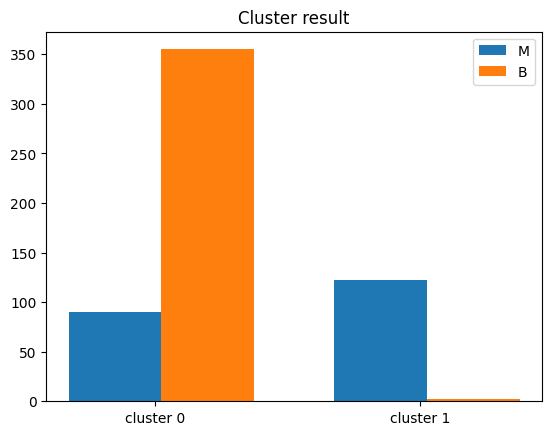

In [14]:
# YOUR CODE HERE
# 聚类结果可视化
cluster_selected = getResult(data_y, y_hat_selected)
print(cluster_selected)
draw_bar(cluster_selected)

In [15]:
# YOUR CODE HERE
# 计算评价指标FMI和NMI
print("NMI: ", normalized_mutual_info_score(data_y.reshape(-1), kmeans_selected.predict(selected_features)))
print("FMI: ", fowlkes_mallows_score(data_y.reshape(-1), kmeans_selected.predict(selected_features)))

NMI:  0.4196358631006222
FMI:  0.7762511790232877
